# Laplacian Score-regularized Concrete Autoencoders Demo

Let import some tools

In [1]:
from pathlib import Path
from torch.utils import data
from scipy.stats import uniform
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from omegaconf import OmegaConf
import numpy as np
import torch
from torch.utils import data

Do not forget to import lscae

In [2]:
import lscae

The default config could be found in src/config.yaml, but you can also pass these arguments as here:

In [3]:
cfg = OmegaConf.create({
    "input_dim": None,          # Dimension of input dataset (total #features)
    "k_selected": 2,            # Number of selected features
    "decoder_lr": 1e-3,         # Decoder learning rate
    "selector_lr": 1e-1,        # Concrete layer learning rate
    "min_lr": 1e-5,             # Minimal layer learning rate
    "weight_decay": 0,          # l2 weight penalty
    "batch_size": 64,           # Minibatch size
    "hidden_dim": 128,          # Hidden layers size
    "model": 'lscae',           # lscae | cae | ls
    "scale_k": 2,               # Number of neighbors for computation of local scales for the kernel
    "laplacian_k": 50,          # Number of neighbors of each pooint, used for computation of the Laplacian
    "start_temp": 10,           # Initial temperature
    "min_temp": 1e-2,           # Final temperature
    "rec_lambda": .5,           # Balance between reconstruction and LS terms
    "num_epochs": 300,          # Number of training epochs
    "verbose": True             # Whether to print to console during training
})


Read a dataset / build a demo two-moons dataset

In [4]:
from scipy.stats import uniform
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

def create_twomoon_dataset(n=1200, d=10, noise=0.1):
    """
    Creates two moon clusters in 2D, adding p nuisance features and d noisy copies of one of the original features
    n: size of data (int)
    d: number of nuisance dimensions (int), and number of redundant copies
    noise: noise level (double)
    """
    relevant, y = make_moons(n_samples=n, shuffle=True, noise=noise, random_state=None)
    nuisance = uniform.rvs(size=[n, d])
    data = np.concatenate([relevant, nuisance], axis=1)
    scaler = StandardScaler()
    data = scaler.fit_transform(data)
    plt.scatter(data[:, 0], data[:, 1])
    plt.show()
    return data

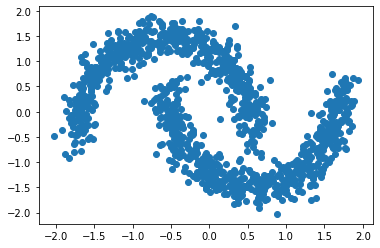

In [5]:
X = create_twomoon_dataset()
# You can load your own dataset as below in numpy format
# path = Path(args.data_dir, args.filename)
# X = np.load(path)
# print('Data shape: ', X.shape)

dataset = data.TensorDataset(torch.Tensor(X))
loader = torch.utils.data.DataLoader(dataset, batch_size=cfg.batch_size, shuffle=True, drop_last=True)
cfg.input_dim = X.shape[1]

In [6]:
lscae_model = lscae.Lscae(kwargs=cfg)
selected_features = lscae_model.select_features(loader)

Epoch 1\300, loss: -0.000, ls loss: -0.00075, recon loss: 0.947
Selection probs: 
  [0.09577649 0.09804294 0.08648097 0.09414516 0.09969555 0.09423417
 0.08418478 0.09986613 0.10033105 0.09234601 0.09501321 0.08171409] 

LS-CAE learning rate = 0.0010000
LS-CAE learning rate = 0.0010000
LS-CAE learning rate = 0.0010000
LS-CAE learning rate = 0.0010000
LS-CAE learning rate = 0.0010000
Epoch 6\300, loss: -0.000, ls loss: -0.00093, recon loss: 0.832
LS-CAE learning rate = 0.0010000
LS-CAE learning rate = 0.0010000
LS-CAE learning rate = 0.0010000
LS-CAE learning rate = 0.0010000
LS-CAE learning rate = 0.0010000
Epoch 11\300, loss: 0.000, ls loss: -0.00106, recon loss: 0.827
LS-CAE learning rate = 0.0010000
LS-CAE learning rate = 0.0010000
LS-CAE learning rate = 0.0010000
LS-CAE learning rate = 0.0010000
LS-CAE learning rate = 0.0010000
Epoch 16\300, loss: 0.000, ls loss: -0.00155, recon loss: 0.828
LS-CAE learning rate = 0.0010000
LS-CAE learning rate = 0.0010000
LS-CAE learning rate = 0.0

LS-CAE learning rate = 0.0001000
LS-CAE learning rate = 0.0001000
LS-CAE learning rate = 0.0001000
LS-CAE learning rate = 0.0001000
Epoch 151\300, loss: -0.000, ls loss: -0.90949, recon loss: 0.828
LS-CAE learning rate = 0.0001000
LS-CAE learning rate = 0.0001000
LS-CAE learning rate = 0.0001000
LS-CAE learning rate = 0.0001000
LS-CAE learning rate = 0.0001000
Epoch 156\300, loss: -0.000, ls loss: -0.91012, recon loss: 0.830
LS-CAE learning rate = 0.0001000
LS-CAE learning rate = 0.0001000
LS-CAE learning rate = 0.0001000
LS-CAE learning rate = 0.0001000
LS-CAE learning rate = 0.0001000
Epoch 161\300, loss: -0.000, ls loss: -0.89998, recon loss: 0.826
Selection probs: 
  [1.0000000e+00 1.0000000e+00 2.8803621e-20 3.7107103e-20 1.3082888e-20
 1.7820567e-19 6.8882328e-20 1.0556887e-19 2.2870618e-20 1.5916580e-20
 5.4522020e-20 3.6873573e-20] 

LS-CAE learning rate = 0.0001000
LS-CAE learning rate = 0.0001000
LS-CAE learning rate = 0.0001000
LS-CAE learning rate = 0.0001000
LS-CAE learnin